In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper")
# sns.set_style("darkgrid")

In [25]:
TRAINER_RESULTS = {
    # "SIPD_Best": { 
    #     "file": "propt/lc/sipd_ppo_all_final/", 
    # },
    # "Minigrid_Best": { 
    #     "file": "propt/lc/grids_ppo_all_final/", 
    # },
    "TwoRooms": {
        "file": "propt/lc/grids_ppo_players_final/player_0/"
    },
    "FourRooms": {
        "file": "propt/lc/grids_ppo_players_final/player_1/"
    },
    "SixRooms": {
        "file": "propt/lc/grids_ppo_players_final/player_2/"
    },
    "Cooperator": {
        "file": "propt/lc/sipd_ppo_players_final/player_0/"
    },
    "Defector": {
        "file": "propt/lc/sipd_ppo_players_final/player_1/"
    },
    "TitForTat": {
        "file": "propt/lc/sipd_ppo_players_final/player_2/"
    },
    "WinLooseSwitch": {
        "file": "propt/lc/sipd_ppo_players_final/player_3/"
    },
    "ZD-Extortioner": {
        "file": "propt/lc/sipd_ppo_players_final/player_4/"
    }
    # "SIPD": { 
    #     "file": "propt/lc/sipd_ppo/", 
    # },
    # "SIPD-O": { 
    #     "file": "propt/lc/sipd_ppo_ordered/", 
    # },
    # "SIPD-TSCL": {
    #     "file": "propt/lc/sipd_ppo_tscl/"
    # },
    # "MinAtar": { 
    #     "file": "propt/lc/minatar_dqn/", 
    # },
}

In [36]:
def extract_run_metadata(file: str):
    hypens = file.split('-')
    name = '-'.join(hypens[1:4])
    seed = hypens[4]
    return {'name': name.split('_')[0], 'seed': seed}

def process_results(folder: str):
    data_frames = []
    for file in os.listdir(folder):
        if not ".csv" in file:
            continue
        
        df = pd.read_csv(os.path.join(folder, file))
        metadata = extract_run_metadata(file)
        df['projection'] = metadata['name']
        df['seed'] = metadata['seed']
        df['returns'] = df['Value'].rolling(25).mean().to_numpy()

        data_frames.append(df)

    return pd.concat(data_frames, ignore_index=True)

In [27]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [28]:
def render_learning_curves(
    learning_curves: pd.DataFrame, output_folder: str,
    result_name: str,
):
    with sns.plotting_context("notebook"): 
        figure = plt.figure(figsize=set_size(397.48499))
        sns.lineplot(data=learning_curves, x="Step", y="returns", hue="projection")
        figure.suptitle(result_name)
        figure.savefig(os.path.join(output_folder, f"{result_name}.pdf"), bbox_inches="tight")

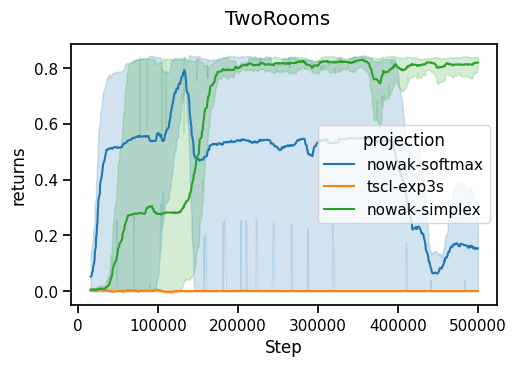

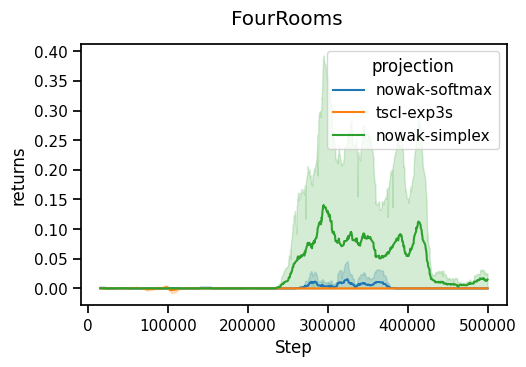

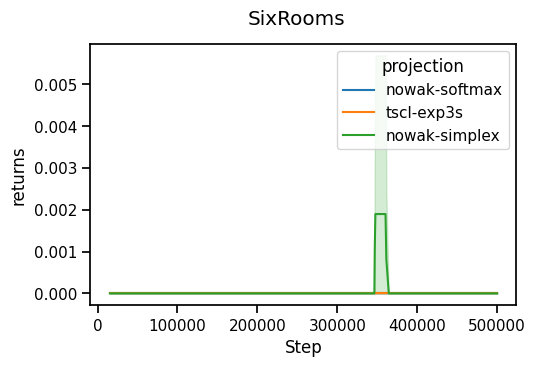

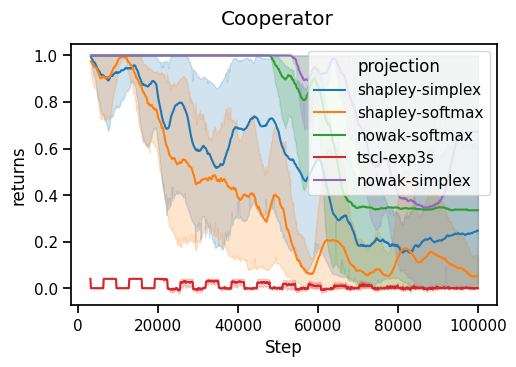

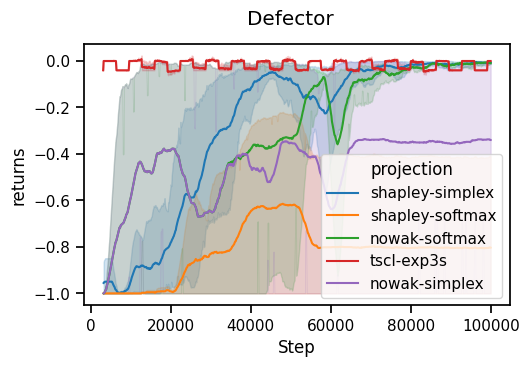

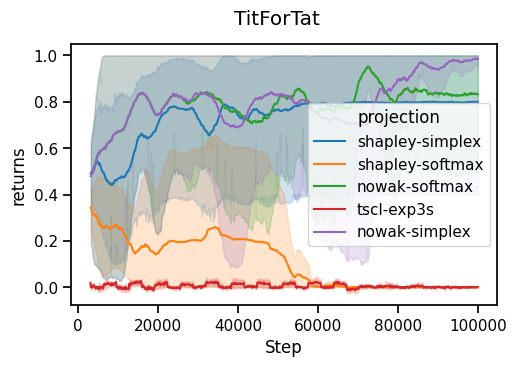

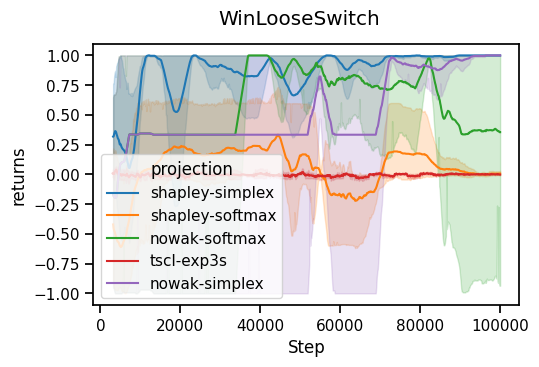

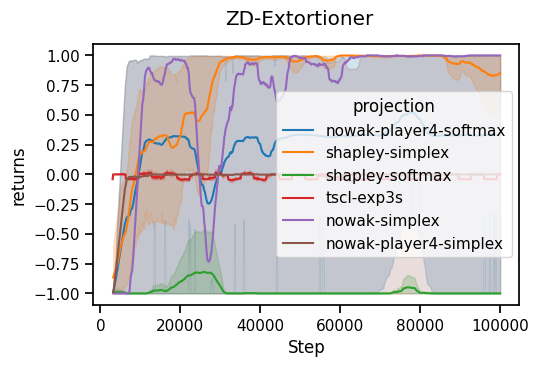

In [29]:
for result in TRAINER_RESULTS:
    folder = TRAINER_RESULTS[result]['file']
    render_learning_curves(
        process_results(folder),
        output_folder=folder,
        result_name=result
    )

# Failures

In [30]:
def render_failures_curves(
    learning_curves: pd.DataFrame, output_folder: str,
    result_name: str,
):
    with sns.plotting_context("notebook"): 
        figure = plt.figure(figsize=set_size(397.48499))
        sns.lineplot(data=learning_curves, x="Step", y="returns", hue="seed")
        figure.suptitle(result_name)
        figure.savefig(os.path.join(output_folder, f"{result_name}.pdf"), bbox_inches="tight")

In [38]:
FAILURE_RESULTS ={
    "Cooperator": {
        "file": "propt/lc/tscl_sipd_failures/player_0/"
    },
    "Defector": {
        "file": "propt/lc/tscl_sipd_failures/player_1/"
    },
    "TitForTat": {
        "file": "propt/lc/tscl_sipd_failures/player_2/"
    },
    "WinLooseSwitch": {
        "file": "propt/lc/tscl_sipd_failures/player_3/"
    },
    "ZD-Extortioner": {
        "file": "propt/lc/tscl_sipd_failures/player_4/"
    },
        "TwoRooms": {
        "file": "propt/lc/tscl_grids_failures/player_0/"
    },
    "FourRooms": {
        "file": "propt/lc/tscl_grids_failures/player_1/"
    },
    "SixRooms": {
        "file": "propt/lc/tscl_grids_failures/player_2/"
    },
}

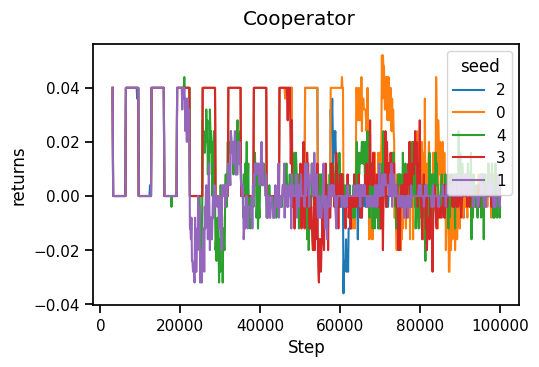

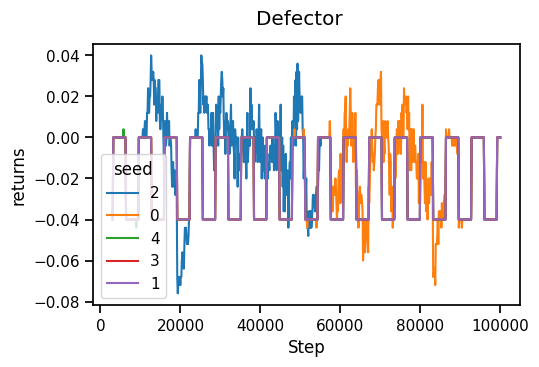

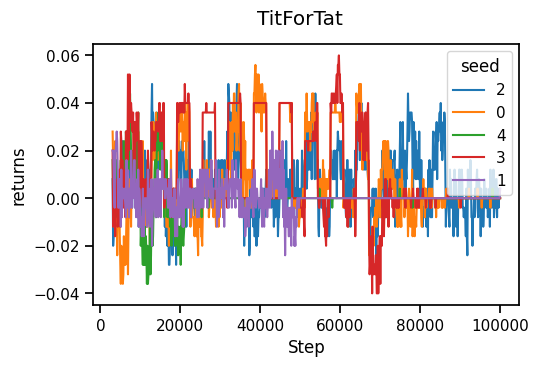

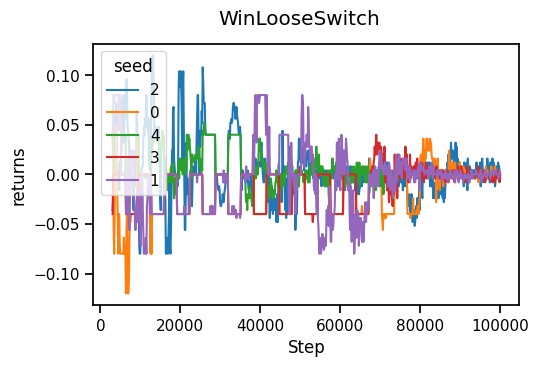

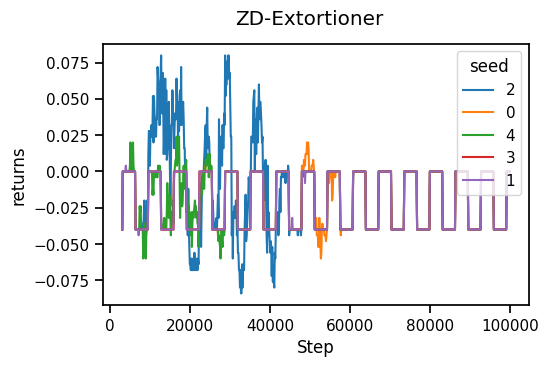

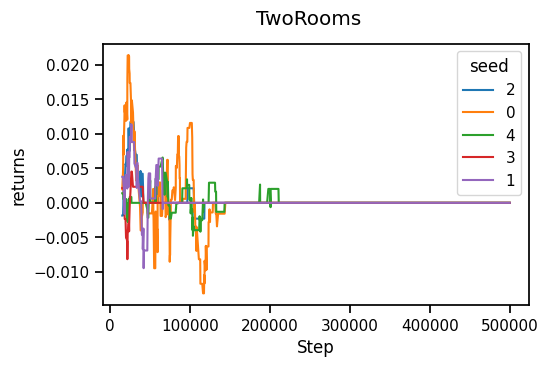

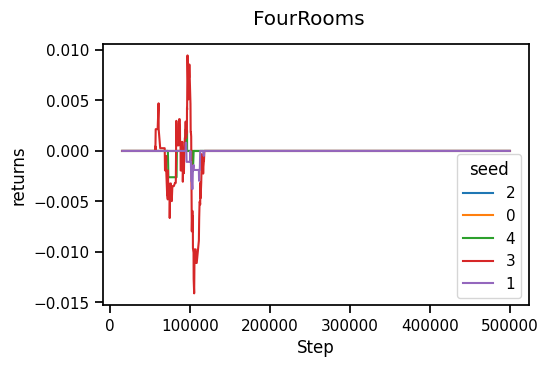

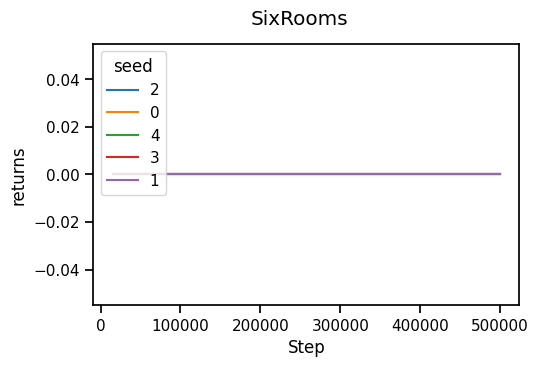

In [39]:
for result in FAILURE_RESULTS:
    folder = FAILURE_RESULTS[result]['file']
    render_failures_curves(
        process_results(folder),
        output_folder=folder,
        result_name=result
    )